#Práctica Propuesta- SimPy SED

In [17]:
pip install simpy

In [18]:
import simpy
import random


# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 7 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 9
# Tiempo de simulación (minutos)
TIEMPO_SIMULACION = 15

# Creamos una clase que permita modelar mi escenario
class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(TIEMPO_LAVADO)
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        

# Generamos el proceso de cola
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado completo a las %.2f.' % (nombre, env.now))
    
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        # Generamos un procesos de llegada en un intervalo de 7 - 11 minutos
        yield env.timeout(random.randint(intervalo-2, intervalo+2))
        # Genero la llegada del vehiculo con su nombre que es un contador
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

Lavanderia UPS
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Removido  {50%} suciedad vehiculo => Vehiculo-1 
Removido  {42%} suciedad vehiculo => Vehiculo-2 
Removido  {45%} suciedad vehiculo => Vehiculo-3 
Vehiculo [Vehiculo-1] lavado completo a las 7.00.
Vehiculo [Vehiculo-2] lavado completo a las 7.00.
Vehiculo [Vehiculo-3] lavado completo a las 7.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 7.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 7.00.
Llega vehiculo: Vehiculo-6 a la hora 9.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 9.00.
Removido  {82%} suciedad vehiculo => Vehiculo-4 
Removido  {90%} suciedad vehiculo => Vehiculo-5 
Vehiculo [Vehi


Modifique el código anterior a fin de incorporar los siguientes cambios:

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 15- 20 minutos
    * Automóvil: 7-10 minutos
    * Furgoneta: 12-15 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Identificar el recurso maquina dentro de la simulación
* Realice una gráfica comparativa de la simulación con 3 y con 4 máquinas de lavado



In [19]:
import simpy
import random
import numpy as np

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 4
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = {1:20, 2:10, 3:15}
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 9
# Tiempo de simulación
TIEMPO_SIMULACION = 60
# Vehiculos
VEHICULOS = {1:'Bus', 2:'Automóvil', 3:'Furgoneta'}
# Tiempo de traslado hasta la máquina (minutos)
TIEMPO_TRASLADO = {1:4, 2:1, 3:2}
# Diccionario con las máquinas de lavado estado inicial libre
MAQUINASLIBRES = {}
keys = range(NUM_MAQUINAS)
values = ["Libre"]
for i in keys:
        MAQUINASLIBRES[i] = values[0]
        
cantidadVehiculos={}
keys = range(NUM_MAQUINAS)
values = [0]
for i in keys:
        cantidadVehiculos[i] = values[0]

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculoIndex):
               
        yield self.env.timeout(TIEMPO_LAVADO.get(vehiculoIndex))
        
        
    def maquinaLibre(self, key):
        if MAQUINASLIBRES.get(key) == 'Libre':
            return True
        else:
            return False
        
    def llegarMaquina(self, vehiculoId):          
        yield self.env.timeout(TIEMPO_TRASLADO.get(vehiculoId))
    
    def abandonarLavanderia(self):
        yield self.env.timeout(1)
       
    
def llegada_vehiculo(env, vehiculoId, lavanderia,idMaquina):
    print('Llega vehículo: %s a la hora %.2f.' % (VEHICULOS.get(vehiculoId), env.now))
    with lavanderia.maquinas.request() as maquina:
        yield maquina
        yield env.process(lavanderia.llegarMaquina(vehiculoId))
        print('Vehiculo [%s] ASIGNADO a la máquina: %s.' % (VEHICULOS.get(vehiculoId), idMaquina+1))
        
        print('Entra [%s] a lavarse a la hora %.2f.' % (VEHICULOS.get(vehiculoId), env.now))

        yield env.process(lavanderia.lavar_vehiculo(vehiculoId))
        print('Vehiculo [%s] SALE lavado a las %.2f de la máquina: %s.' % (VEHICULOS.get(vehiculoId), env.now, idMaquina+1))

        yield env.process(lavanderia.abandonarLavanderia())    
        MAQUINASLIBRES[idMaquina]='Libre'
        print('Vehiculo [%s] abandona la lavanderia a las: %.2f.' % (VEHICULOS.get(vehiculoId), env.now))
            
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 3 llegadas de vehiculos iniciales
    for i in range(3):
        for j in range(num_maquinas):
            if lavanderia.maquinaLibre(j):
                MAQUINASLIBRES[j]='Ocupada'
                env.process(llegada_vehiculo(env, random.randint(1,3), lavanderia,j))
                cantidadVehiculos[j]+=1
                break;
            else:
                j-=1
                i-=1
                
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-2, intervalo+2))
        #Mientras se lavan los vehiculos generamos mas vehiculos
        for j in range(num_maquinas):
            if lavanderia.maquinaLibre(j):
                MAQUINASLIBRES[j]='Ocupada'
                env.process(llegada_vehiculo(env, random.randint(1,3), lavanderia,j))
                cantidadVehiculos[j]+=1
                break;
            else:
                j=0
        
        

env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until= TIEMPO_SIMULACION) 
print(cantidadVehiculos)

Llega vehículo: Bus a la hora 0.00.
Llega vehículo: Automóvil a la hora 0.00.
Llega vehículo: Automóvil a la hora 0.00.
Vehiculo [Automóvil] ASIGNADO a la máquina: 2.
Entra [Automóvil] a lavarse a la hora 1.00.
Vehiculo [Automóvil] ASIGNADO a la máquina: 3.
Entra [Automóvil] a lavarse a la hora 1.00.
Vehiculo [Bus] ASIGNADO a la máquina: 1.
Entra [Bus] a lavarse a la hora 4.00.
Llega vehículo: Furgoneta a la hora 11.00.
Vehiculo [Automóvil] SALE lavado a las 11.00 de la máquina: 2.
Vehiculo [Automóvil] SALE lavado a las 11.00 de la máquina: 3.
Vehiculo [Automóvil] abandona la lavanderia a las: 12.00.
Vehiculo [Automóvil] abandona la lavanderia a las: 12.00.
Vehiculo [Furgoneta] ASIGNADO a la máquina: 4.
Entra [Furgoneta] a lavarse a la hora 13.00.
Llega vehículo: Bus a la hora 19.00.
Vehiculo [Bus] ASIGNADO a la máquina: 2.
Entra [Bus] a lavarse a la hora 23.00.
Vehiculo [Bus] SALE lavado a las 24.00 de la máquina: 1.
Vehiculo [Bus] abandona la lavanderia a las: 25.00.
Vehiculo [Furgon

#### Gráfica con 3 máquinas de lavado.

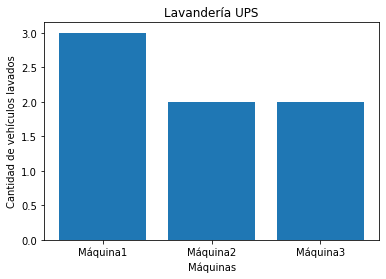

In [20]:
import matplotlib.pyplot as plt
maquinas = ['Máquina1', 'Máquina2', 'Máquina3']

values = [cantidadVehiculos[0],cantidadVehiculos[1],cantidadVehiculos[2]]

plt.bar(maquinas, values)
plt.xlabel('Máquinas') 
plt.ylabel('Cantidad de vehículos lavados') 
  
# displaying the title
plt.title("Lavandería UPS")
plt.show()

###Gráfica con 4 máquinas de lavado.

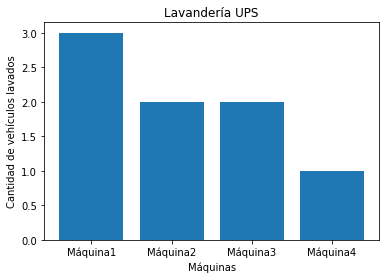

In [21]:
import matplotlib.pyplot as plt
maquinas = ['Máquina1', 'Máquina2', 'Máquina3', 'Máquina4']
values = cantidadVehiculos.values()

plt.bar(maquinas, values)
plt.xlabel('Máquinas') 
plt.ylabel('Cantidad de vehículos lavados') 
  
# displaying the title
plt.title("Lavandería UPS")
plt.show()